

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*


------

# Objective 

We are going to run a few experiments today

- Train a model with and without normalized data and investigate the weight values and learning outcomes
- Train a model with varying values for batch_size, learning_rate, and optimizers

We are essentially running mannual gridsearches on our models. In module 3, we'll learn a few different ways to automate gridseach for deep learning. 

In [46]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam, SGD, Adagrad, Adamax, Nadam
from keras.activations import relu
from tensorflow.keras.callbacks import TensorBoard

In [2]:
%matplotlib inline
%load_ext tensorboard

### Load data

- Don't normalize your data just yet!

In [3]:
def load_quickdraw10():
    """
    Fill out this doc string, and comment the code, for practice in writing the kind of code that will get you hired. 
    """
    
    URL_ = "https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true"
    
    path_to_zip = tf.keras.utils.get_file('./quickdraw10.npz', origin=URL_, extract=False)

    data = np.load(path_to_zip)

    X = data['arr_0']
    Y = data['arr_1']
        
    return train_test_split(X, Y, shuffle=True)

In [4]:
X_train, X_test, y_train, y_test = load_quickdraw10()

In [5]:
n_labels = len(np.unique(y_train))

In [6]:
X_train.shape

(75000, 784)

----
### Write a Model Function
- Write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. 

Your function `create_model` should accept the following parameters

- Learning Rate `lr`
- Optimizer `opt`


Build a model with the following architecture and parameter values

- Use `1 hidden layer` 
- Use `sigmoid` activation function in hidden layer
- Use `250 nodes` in hidden layer 
- Use `10 nodes` in output layer
- Use `softmax` activation fucntion in output layer
- Use `sparse_categorical_crossentropy` loss function
- Use `accuracy` as your metric 

We will use this function to build all the models that we'll need to run our experiments. 

In [7]:
n_labels

10

In [8]:
def create_model(lr=.01, opt="adam"):
    """
    
    Build and returns a complies Keras model.  
    
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    opt: string
        Name of optimizer to use
        Valid options are "adam" and "sgd"
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """

    if opt == "adam":
        opt = Adam(learning_rate=lr)
    elif opt == 'sgd':
        opt = SGD(learning_rate=lr)
    else:
        print ("{} is not a valid option. Defaulting to Adam optimizer".format(opt))
        opt = Adam(learning_rate=lr)

    # build model here
    model = Sequential()
    model.add(Dense(250, 
                    activation='sigmoid', 
                    input_dim=784))
    model.add(Dense(10, 
                   activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [9]:
# a check on model architecture
model = create_model()
n_layers = len(model.get_config()["layers"])
output_act_funct =  model.get_config()["layers"][-1]["config"]["activation"]

assert n_layers == 3, "You should have an input, one hidden, and an output layer"
assert output_act_funct == "softmax", "Output act funct should be softmax"

------

# Experiment #1: How does normalized input data affect our model's learning outcome?

In this experiment we are going to answer the above question by training identifical models on a normalized data set and on a non-normalized data set. 

Then we will 

- Analyze the trained weight values of our model 
- Plot

In [10]:
# Clear any logs from previous runs
!rm -rf ./logs/

### Fit Model on Non-Normalized data

In [11]:
# fit model on non-normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"No_Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

model = create_model(lr=.001, opt="adam")

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 5s 2ms/step - loss: 1.1403 - accuracy: 0.6440 - val_loss: 0.8617 - val_accuracy: 0.7374
Epoch 2/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.8346 - accuracy: 0.7427 - val_loss: 0.7776 - val_accuracy: 0.7628
Epoch 3/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7794 - accuracy: 0.7570 - val_loss: 0.7654 - val_accuracy: 0.7651
Epoch 4/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7550 - accuracy: 0.7647 - val_loss: 0.7527 - val_accuracy: 0.7708
Epoch 5/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7350 - accuracy: 0.7740 - val_loss: 0.7387 - val_accuracy: 0.7686
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7095 - accuracy: 0.7790 - val_loss: 0.7110 - val_accuracy: 0.7790
Epoch 7/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.6926 - accuracy: 0.7822 - val_loss: 0.7006 - val_accuracy:

---------

### Fit Model on Normalized data

In [12]:
# Normalize your training and test sets 
# save normalized data to X_train_scaled and X_test_scaled

# YOUR CODE HERE
X_train_scaled = X_train.astype('float32')/255
X_test_scaled = X_test.astype('float32')/255

In [13]:
# train model on normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

norm_model = create_model(lr=.001, opt="adam")

norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.9514 - accuracy: 0.7160 - val_loss: 0.6576 - val_accuracy: 0.7987
Epoch 2/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.5705 - accuracy: 0.8318 - val_loss: 0.5314 - val_accuracy: 0.8426
Epoch 3/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4666 - accuracy: 0.8600 - val_loss: 0.4788 - val_accuracy: 0.8582
Epoch 4/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4168 - accuracy: 0.8750 - val_loss: 0.4599 - val_accuracy: 0.8619
Epoch 5/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.3629 - accuracy: 0.8923 - val_loss: 0.4459 - val_accuracy: 0.8663
Epoch 6/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.3262 - accuracy: 0.9035 - val_loss: 0.4389 - val_accuracy: 0.8695
Epoch 7/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.2921 - accuracy: 0.9143 - val_loss: 0.4368 - val_accuracy:

### Each layer is labeled

Take note of the label for each layer in the network. It is these labels that will help you identify the corresponding bias and weight distribtuions on tensorboard. 

Assuming that you've ran `create_model` 3 times: once for the model check, once to create `model`, and once to create `norm_model`:

The name of the layers for `model` should be 
- dense_2
- dense_3

The name of the layers for `norm_model` should be 
- dense_4
- dense_5


If you keep retraining one or both of these models, tensorflow will increment the integer used in the layer names.  But that doesn't really matter, just take notice of the layer names so you can find their corresponding bias and weight distribtuions in tensorboard.

**Protip:** If you want to reset the integer incrementation that tensorflow uses, you'll need to restart your notebook's kernal. 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


In [15]:
norm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


### Tensorboard 

- Run the cell below to launch tensorboard 
- Click on the `SCALARS` tab to see plots that compare the loss and accuracy between the two models
- Cick on the `HISTOGRAMS` tab to see the distribution of the learned weights 

In [16]:
%tensorboard --logdir logs

### Tensorboard 

Check out the loss and accuracy plots on the `SCALARS` tab. 

What you should see is that the accuracy is much higher for the model that was given normalized data; conversely, the loss is much lower for the model that was given normalized data. 

Recall that what we are doing whenever training a model is adjusting the value of the bias and weights in each layer. For simplicity of analysis, we only trained two layers: a hidden layer and the output layer. 

Now click on the `HISTOGRAM` tab. 

You should see both of your model's layer names. 

### Hidden Layer Distributions

Collapse the charts that correspond to the output layer so only the distributions for the weights and bias in the hidden layer are showing. (i.e. Only expand `dense_2` and `dense_4`). 

Also don't be confused by the word `kernel`, that's just the word that Tensorflow uses instead of weights. So, to be clear, **the kernal distributions are the weight values.** 

The `bias` distributions are the bias values. 

You should see 10 distributions stacked next to each other, **one distribution per epoch.**

The distribuion in the far back corresponds to the weight values at epoch 1 (tensorflow starts the count at 0, like the index for a list). The distribution at the very front corresponds to the weight values at the 10th epoch (tensorflow indexing show 9 instead of 10).

Notice how the shape of the distribution changes accross epochs? That's because their **values are being updated via Gradient Descent.** 

The distributions that you see are direclty responsible for the validation accuracy of our models. The reason why they look different between the two models is because one model was given normalize data and one wasn't. So you can conclude that the weight distributions in `dense_4` produce a higher validation accuracy than the weight distributions in `dense_2`. 

Now it's time to analyze those weight values more closely. 

----------
### Analyze Weights in Each Layer

In [19]:
# get the final bias and weight matrices for model
layer = model.get_layer(name="dense_2")
bias, weights = layer.get_weights()

In [20]:
# get the final  value bias and weight magrices for norm_moel
layer = norm_model.get_layer(name="dense_4")
bias_norm, weights_norm = layer.get_weights()

In [21]:
# this line of code should not throw an error if the number of weights is the same for the hidden layer of both models
# this line of code is known as a Unit Test 
assert weights.shape[0] == weights_norm.shape[0]

### Initial Weight Values

By default, Keras dense layers randomly initialize the weight values using [**GlorotUniform**](https://keras.io/api/layers/initializers/). 

The cell below is sampling values from the GlorotUniform distribution. Let's sample from the GlorotUniform distribution and plot it in order to get a sense of the initial distribution of our weights - before Gradient Descent starts upading their values at training time. 

In [22]:
# let's take 250 random samples form the GlorotUniform
# because they are random samples their exact values might have been a little different for model and norm_model - but we will assume that they were not statistically different 
# 250 because that's how many weights are in the hidden layer for both of our models
initializer = tf.keras.initializers.GlorotUniform(seed=1234)
initial_weight_values = initializer(shape=(1, 250))

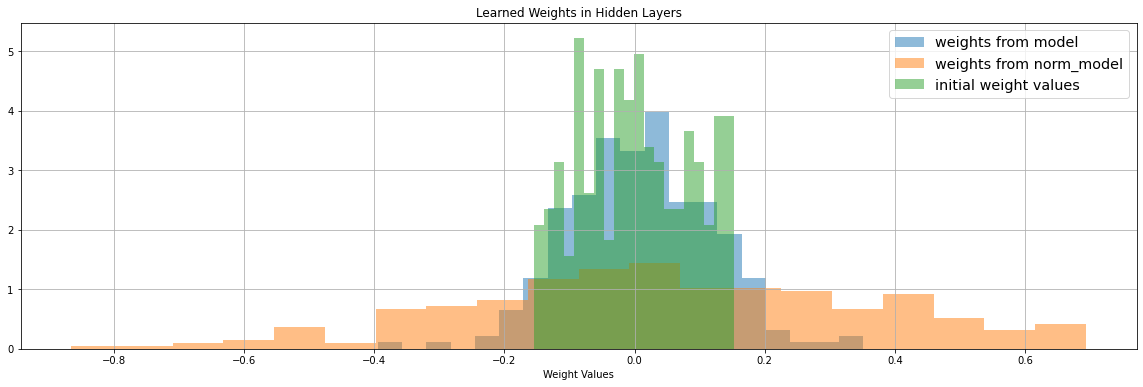

In [23]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

# by setting density=True, we are transforming our plots into probability distributions 
plt.hist(weights, bins=20, alpha=0.5, label="weights from model", density=True);
plt.hist(weights_norm, bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(initial_weight_values, bins=20, alpha=0.5, label="initial weight values", density=True);
plt.legend(fontsize="x-large");

### Observations

Your plot should have 3 distributions

- weights from model trained on non-normalized data
- weights from model trained on normalized data
- initial weight values sampled from a Glorot Uniform distributions 

Use the plot to answer the following questions.

**Comparing the initial weights with weights_from_model, what was the effect of not using normalized data?**

YOUR ANSWER HERE: The distribution of weights is compact when not using noremalized data compare to using normalized data

**Comparing the initial weights with weights_from_norm_model, what was the effect of using normalized data?**

YOUR ANSWER HERE: The distribution of the weights when using normalized data is spread out compare to using non normalize data

**Using your understand of how Gradient Descent works, why do you think that the distributions between weights_from_model and weights_from_norm_model look so different?**

YOUR ANSWER HERE: Using the equation $$ \frac{dy}{dw} =  x  $$ the value of weights is larger than when the data input x is smaller hence normalization

----

# Additional Experiments

The previous experiment demonstrated the importance of normalizing our data in order to maximize model accuracy. In the next few experiments, we are going to explore the effect that certain values for Batch Size, Learning Rate, and different Optimizers have on model accuracy. 

Using our **create_model** model building function, conduct the following experiments. 

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [24]:
model = create_model()
bt_default = model.fit(X_train_scaled, y_train, batch_size=32, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.7684 - accuracy: 0.7620 - val_loss: 0.5607 - val_accuracy: 0.8334
Epoch 2/5
2344/2344 [==============================] - 4s 2ms/step - loss: 0.5334 - accuracy: 0.8382 - val_loss: 0.5958 - val_accuracy: 0.8272
Epoch 3/5
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8481 - val_loss: 0.5389 - val_accuracy: 0.8417
Epoch 4/5
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4720 - accuracy: 0.8553 - val_loss: 0.5500 - val_accuracy: 0.8382
Epoch 5/5
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4470 - accuracy: 0.8632 - val_loss: 0.5634 - val_accuracy: 0.8394


In [25]:
model = create_model()
bt_1 = model.fit(X_train_scaled, y_train, batch_size=5, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
15000/15000 [==============================] - 23s 2ms/step - loss: 0.9017 - accuracy: 0.7220 - val_loss: 0.8191 - val_accuracy: 0.7584
Epoch 2/5
15000/15000 [==============================] - 20s 1ms/step - loss: 0.7500 - accuracy: 0.7823 - val_loss: 0.7238 - val_accuracy: 0.7927
Epoch 3/5
15000/15000 [==============================] - 21s 1ms/step - loss: 0.7005 - accuracy: 0.7966 - val_loss: 0.7041 - val_accuracy: 0.8013
Epoch 4/5
15000/15000 [==============================] - 22s 1ms/step - loss: 0.6728 - accuracy: 0.8063 - val_loss: 0.7109 - val_accuracy: 0.8058
Epoch 5/5
15000/15000 [==============================] - 23s 2ms/step - loss: 0.6460 - accuracy: 0.8116 - val_loss: 0.7212 - val_accuracy: 0.8043


In [26]:
model = create_model()
bt_2 = model.fit(X_train_scaled, y_train, batch_size=100, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 0.8266 - accuracy: 0.7462 - val_loss: 0.5419 - val_accuracy: 0.8372
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.4837 - accuracy: 0.8527 - val_loss: 0.5104 - val_accuracy: 0.8496
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.4231 - accuracy: 0.8721 - val_loss: 0.5113 - val_accuracy: 0.8494
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3815 - accuracy: 0.8836 - val_loss: 0.5118 - val_accuracy: 0.8512
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3437 - accuracy: 0.8967 - val_loss: 0.5191 - val_accuracy: 0.8530


In [27]:
model = create_model()
bt_3 = model.fit(X_train_scaled, y_train, batch_size=500, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
150/150 [==============================] - 1s 5ms/step - loss: 1.0844 - accuracy: 0.6606 - val_loss: 0.6169 - val_accuracy: 0.8166
Epoch 2/5
150/150 [==============================] - 1s 4ms/step - loss: 0.5677 - accuracy: 0.8304 - val_loss: 0.5246 - val_accuracy: 0.8446
Epoch 3/5
150/150 [==============================] - 1s 4ms/step - loss: 0.4623 - accuracy: 0.8631 - val_loss: 0.4813 - val_accuracy: 0.8566
Epoch 4/5
150/150 [==============================] - 1s 4ms/step - loss: 0.3977 - accuracy: 0.8829 - val_loss: 0.4615 - val_accuracy: 0.8628
Epoch 5/5
150/150 [==============================] - 1s 4ms/step - loss: 0.3465 - accuracy: 0.8982 - val_loss: 0.4718 - val_accuracy: 0.8592


In [28]:
model = create_model()
bt_4 = model.fit(X_train_scaled, y_train, batch_size=1000, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
75/75 [==============================] - 1s 8ms/step - loss: 1.3469 - accuracy: 0.5747 - val_loss: 0.7071 - val_accuracy: 0.7934
Epoch 2/5
75/75 [==============================] - 0s 7ms/step - loss: 0.6587 - accuracy: 0.8071 - val_loss: 0.6094 - val_accuracy: 0.8190
Epoch 3/5
75/75 [==============================] - 0s 7ms/step - loss: 0.5572 - accuracy: 0.8352 - val_loss: 0.5417 - val_accuracy: 0.8366
Epoch 4/5
75/75 [==============================] - 0s 6ms/step - loss: 0.4826 - accuracy: 0.8564 - val_loss: 0.5036 - val_accuracy: 0.8503
Epoch 5/5
75/75 [==============================] - 0s 6ms/step - loss: 0.4260 - accuracy: 0.8743 - val_loss: 0.4784 - val_accuracy: 0.8568


In [29]:
batch_sizes = []

for exp, result in zip([bt_default, bt_1, bt_2, bt_3, bt_4], ["32_", "5_", "100_", "500_", "1000_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.651703,0.800907,0.560721,0.83336,0,32_
1,0.538247,0.838013,0.595848,0.82716,1,32_
2,0.497873,0.848813,0.538897,0.84172,2,32_
3,0.474332,0.855640,0.549985,0.83824,3,32_
4,0.453699,0.861187,0.563438,0.83940,4,32_


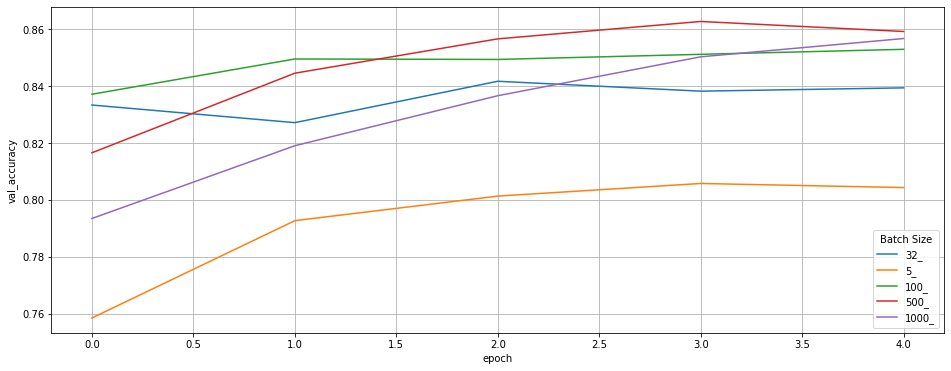

In [33]:
plt.figure(figsize=(16,6))
plt.grid()
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

Batch size 500 has the highest validation accuracy. Batch size too small doesn't give a high validation accuracy

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [34]:
model = create_model(lr=1)
bt_1 = model.fit(X_train_scaled, y_train, batch_size=32, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
2344/2344 [==============================] - 5s 2ms/step - loss: 16.2455 - accuracy: 0.3482 - val_loss: 10.7844 - val_accuracy: 0.4591
Epoch 2/5
2344/2344 [==============================] - 4s 2ms/step - loss: 10.2593 - accuracy: 0.4142 - val_loss: 10.4413 - val_accuracy: 0.4576
Epoch 3/5
2344/2344 [==============================] - 4s 2ms/step - loss: 10.0330 - accuracy: 0.4238 - val_loss: 6.0231 - val_accuracy: 0.5170
Epoch 4/5
2344/2344 [==============================] - 4s 2ms/step - loss: 9.8939 - accuracy: 0.4638 - val_loss: 8.3857 - val_accuracy: 0.5154
Epoch 5/5
2344/2344 [==============================] - 4s 2ms/step - loss: 9.1242 - accuracy: 0.4875 - val_loss: 9.2848 - val_accuracy: 0.5326


In [35]:
model = create_model(lr=.1)
bt_2 = model.fit(X_train_scaled, y_train, batch_size=32, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
2344/2344 [==============================] - 5s 2ms/step - loss: 1.5727 - accuracy: 0.5783 - val_loss: 1.4319 - val_accuracy: 0.6104
Epoch 2/5
2344/2344 [==============================] - 4s 2ms/step - loss: 1.1642 - accuracy: 0.6750 - val_loss: 1.0697 - val_accuracy: 0.6857
Epoch 3/5
2344/2344 [==============================] - 5s 2ms/step - loss: 1.1232 - accuracy: 0.6769 - val_loss: 1.0744 - val_accuracy: 0.6923
Epoch 4/5
2344/2344 [==============================] - 5s 2ms/step - loss: 1.0775 - accuracy: 0.6975 - val_loss: 1.0238 - val_accuracy: 0.7096
Epoch 5/5
2344/2344 [==============================] - 5s 2ms/step - loss: 1.0196 - accuracy: 0.7086 - val_loss: 1.0390 - val_accuracy: 0.6974


In [36]:
model = create_model(lr=.01)
bt_3 = model.fit(X_train_scaled, y_train, batch_size=32, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.7757 - accuracy: 0.7593 - val_loss: 0.5688 - val_accuracy: 0.8286
Epoch 2/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.5348 - accuracy: 0.8366 - val_loss: 0.5881 - val_accuracy: 0.8270
Epoch 3/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4927 - accuracy: 0.8495 - val_loss: 0.5616 - val_accuracy: 0.8358
Epoch 4/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4736 - accuracy: 0.8546 - val_loss: 0.5593 - val_accuracy: 0.8374
Epoch 5/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4345 - accuracy: 0.8650 - val_loss: 0.5597 - val_accuracy: 0.8389


In [37]:
model = create_model(lr=.001)
bt_4 = model.fit(X_train_scaled, y_train, batch_size=32, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.9628 - accuracy: 0.7115 - val_loss: 0.6317 - val_accuracy: 0.8152
Epoch 2/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.5725 - accuracy: 0.8309 - val_loss: 0.5266 - val_accuracy: 0.8448
Epoch 3/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4710 - accuracy: 0.8610 - val_loss: 0.4809 - val_accuracy: 0.8571
Epoch 4/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4107 - accuracy: 0.8777 - val_loss: 0.4585 - val_accuracy: 0.8623
Epoch 5/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.3670 - accuracy: 0.8903 - val_loss: 0.4474 - val_accuracy: 0.8675


In [38]:
model = create_model(lr=.0001)
bt_5 = model.fit(X_train_scaled, y_train, batch_size=32, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
2344/2344 [==============================] - 5s 2ms/step - loss: 1.4655 - accuracy: 0.5898 - val_loss: 0.9022 - val_accuracy: 0.7422
Epoch 2/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.8651 - accuracy: 0.7522 - val_loss: 0.8123 - val_accuracy: 0.7642
Epoch 3/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.7838 - accuracy: 0.7718 - val_loss: 0.7645 - val_accuracy: 0.7784
Epoch 4/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.7459 - accuracy: 0.7825 - val_loss: 0.7268 - val_accuracy: 0.7892
Epoch 5/5
2344/2344 [==============================] - 5s 2ms/step - loss: 0.6946 - accuracy: 0.7988 - val_loss: 0.6959 - val_accuracy: 0.7983


In [40]:
learning_rates = []

for exp, result in zip([bt_1, bt_2, bt_3, bt_4, bt_5], ["1_", ".1_", ".01_", ".001_", ".0001_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learn Rate'] = result

    learning_rates.append(df)

df = pd.concat(learning_rates)
df['Learn Rate'] = df['Learn Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learn Rate
0,11.590125,0.385573,10.784443,0.45908,0,1_
1,10.416636,0.425307,10.441300,0.45760,1,1_
2,9.753556,0.440320,6.023084,0.51696,2,1_
3,9.440802,0.465387,8.385694,0.51544,3,1_
4,9.606756,0.481893,9.284779,0.53256,4,1_


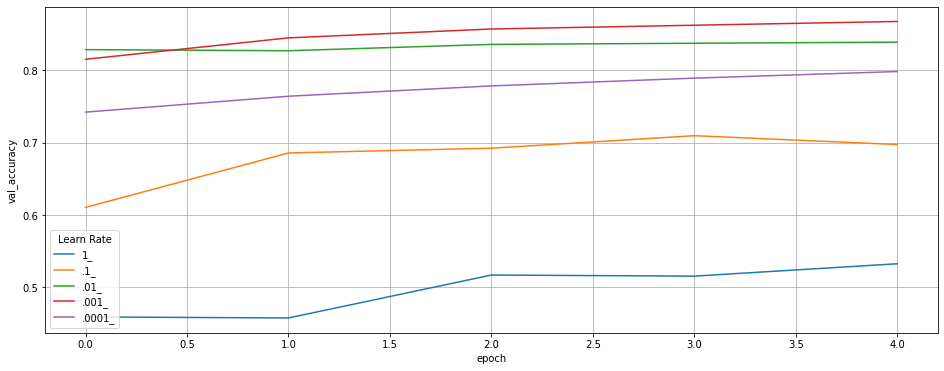

In [41]:
plt.figure(figsize=(16,6))
plt.grid()
sns.lineplot(x='epoch', y='val_accuracy', hue='Learn Rate', data=df);

The smaller the learning rate the higher the validation accuracy. However the lowest lerning rate doesn't have the highest val acc. This could be the model need more epoch to reach its highet val acc.

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [42]:
def create_model(opt):
    """
    
    Build and returns a complies Keras model.  
    
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    opt: string
        Name of optimizer to use
        Valid options are "adam" and "sgd"
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """

    # build model here
    model = Sequential()
    model.add(Dense(250, 
                    activation='sigmoid', 
                    input_dim=784))
    model.add(Dense(10, 
                   activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [43]:
model = create_model(opt=Adam(learning_rate=.1))
bt_adam = model.fit(X_train_scaled, y_train, batch_size=500, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
150/150 [==============================] - 1s 5ms/step - loss: 2.0158 - accuracy: 0.5554 - val_loss: 0.7974 - val_accuracy: 0.7618
Epoch 2/5
150/150 [==============================] - 1s 4ms/step - loss: 0.7369 - accuracy: 0.7738 - val_loss: 0.7341 - val_accuracy: 0.7761
Epoch 3/5
150/150 [==============================] - 1s 4ms/step - loss: 0.6946 - accuracy: 0.7875 - val_loss: 0.7025 - val_accuracy: 0.7875
Epoch 4/5
150/150 [==============================] - 1s 4ms/step - loss: 0.6549 - accuracy: 0.8006 - val_loss: 0.6948 - val_accuracy: 0.7915
Epoch 5/5
150/150 [==============================] - 1s 4ms/step - loss: 0.6510 - accuracy: 0.8011 - val_loss: 0.6863 - val_accuracy: 0.7947


In [44]:
model = create_model(opt=SGD(learning_rate=.1))
bt_sgd = model.fit(X_train_scaled, y_train, batch_size=500, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
150/150 [==============================] - 1s 5ms/step - loss: 1.9414 - accuracy: 0.4480 - val_loss: 1.2815 - val_accuracy: 0.6634
Epoch 2/5
150/150 [==============================] - 1s 4ms/step - loss: 1.1959 - accuracy: 0.6803 - val_loss: 1.0494 - val_accuracy: 0.7019
Epoch 3/5
150/150 [==============================] - 1s 4ms/step - loss: 1.0172 - accuracy: 0.7116 - val_loss: 0.9613 - val_accuracy: 0.7235
Epoch 4/5
150/150 [==============================] - 1s 4ms/step - loss: 0.9528 - accuracy: 0.7256 - val_loss: 0.9195 - val_accuracy: 0.7310
Epoch 5/5
150/150 [==============================] - 1s 4ms/step - loss: 0.9033 - accuracy: 0.7373 - val_loss: 0.8908 - val_accuracy: 0.7409


In [47]:
model = create_model(opt=Adagrad(learning_rate=.1))
bt_adagrad = model.fit(X_train_scaled, y_train, batch_size=500, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
150/150 [==============================] - 1s 5ms/step - loss: 1.6735 - accuracy: 0.4695 - val_loss: 0.9901 - val_accuracy: 0.7065
Epoch 2/5
150/150 [==============================] - 1s 4ms/step - loss: 0.9212 - accuracy: 0.7317 - val_loss: 0.8769 - val_accuracy: 0.7478
Epoch 3/5
150/150 [==============================] - 1s 4ms/step - loss: 0.8607 - accuracy: 0.7480 - val_loss: 0.8444 - val_accuracy: 0.7546
Epoch 4/5
150/150 [==============================] - 1s 4ms/step - loss: 0.8227 - accuracy: 0.7610 - val_loss: 0.8164 - val_accuracy: 0.7618
Epoch 5/5
150/150 [==============================] - 1s 4ms/step - loss: 0.7933 - accuracy: 0.7670 - val_loss: 0.7982 - val_accuracy: 0.7693


In [48]:
model = create_model(opt=Adamax(learning_rate=.1))
bt_adamax = model.fit(X_train_scaled, y_train, batch_size=500, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
150/150 [==============================] - 1s 5ms/step - loss: 2.9562 - accuracy: 0.4629 - val_loss: 0.7380 - val_accuracy: 0.7794
Epoch 2/5
150/150 [==============================] - 1s 4ms/step - loss: 0.6940 - accuracy: 0.7914 - val_loss: 0.6772 - val_accuracy: 0.8003
Epoch 3/5
150/150 [==============================] - 1s 4ms/step - loss: 0.6318 - accuracy: 0.8098 - val_loss: 0.6465 - val_accuracy: 0.8062
Epoch 4/5
150/150 [==============================] - 1s 4ms/step - loss: 0.5898 - accuracy: 0.8209 - val_loss: 0.6255 - val_accuracy: 0.8134
Epoch 5/5
150/150 [==============================] - 1s 5ms/step - loss: 0.5578 - accuracy: 0.8336 - val_loss: 0.6158 - val_accuracy: 0.8164


In [49]:
model = create_model(opt=Nadam(learning_rate=.1))
bt_nadam = model.fit(X_train_scaled, y_train, batch_size=500, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
150/150 [==============================] - 1s 6ms/step - loss: 1.8843 - accuracy: 0.5686 - val_loss: 0.7193 - val_accuracy: 0.7815
Epoch 2/5
150/150 [==============================] - 1s 5ms/step - loss: 0.7062 - accuracy: 0.7826 - val_loss: 0.8241 - val_accuracy: 0.7501
Epoch 3/5
150/150 [==============================] - 1s 5ms/step - loss: 0.6659 - accuracy: 0.7980 - val_loss: 0.6965 - val_accuracy: 0.7946
Epoch 4/5
150/150 [==============================] - 1s 5ms/step - loss: 0.6398 - accuracy: 0.8055 - val_loss: 0.6481 - val_accuracy: 0.8030
Epoch 5/5
150/150 [==============================] - 1s 5ms/step - loss: 0.6060 - accuracy: 0.8148 - val_loss: 0.6432 - val_accuracy: 0.8088


In [50]:
optimizer = []

for exp, result in zip([bt_adam, bt_sgd, bt_adagrad, bt_adamax, bt_nadam], ["adam_", ".sgd_", "adagrad_", "adamax_", "nadam_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimizer'] = result

    optimizer.append(df)

df = pd.concat(optimizer)
df['Optimizer'] = df['Optimizer'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,1.160920,0.685040,0.797398,0.76180,0,adam_
1,0.734603,0.774387,0.734147,0.77612,1,adam_
2,0.698240,0.788307,0.702479,0.78748,2,adam_
3,0.669326,0.796387,0.694755,0.79152,3,adam_
4,0.671284,0.795013,0.686305,0.79468,4,adam_


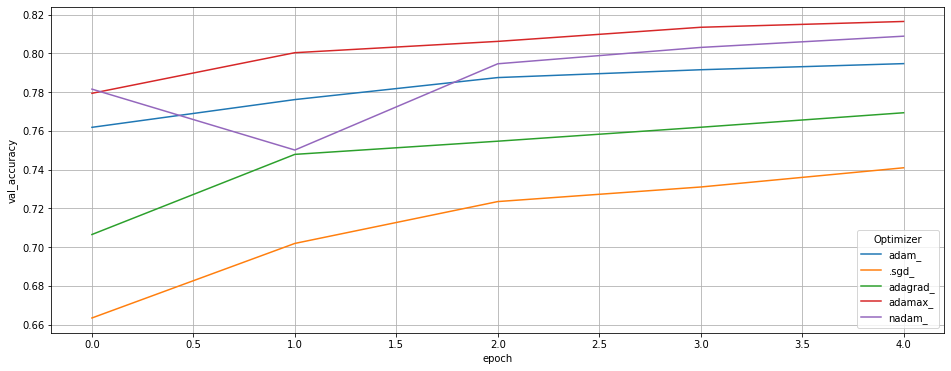

In [51]:
plt.figure(figsize=(16,6))
plt.grid()
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df);

All the adam optimization function seems to have higher val acc

------

## Stretch Goals: 

- On the learning rate experiments, implement [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Review the math of Gradient Descent. 